In [116]:
import pandas as pd
import numpy as np

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns


In [118]:
from scipy import stats

In [119]:
df = pd.read_csv('data/kc_house_data.csv')

In [120]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [122]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [123]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [124]:
df.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [125]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [126]:
df_reno = df[df.yr_renovated != 0]

In [127]:
df_reno = df_reno.dropna()

In [128]:
df_reno

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
35,9547205180,6/13/2014,696000.0,3,2.50,2300,3060,1.5,0.0,0.0,...,8,1510,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264
95,1483300570,9/8/2014,905000.0,4,2.50,3300,10250,1.0,0.0,0.0,...,7,2390,910.0,1946,1991.0,98040,47.5873,-122.249,1950,6045
103,2450000295,10/7/2014,1090000.0,3,2.50,2920,8113,2.0,0.0,0.0,...,8,2920,0.0,1950,2010.0,98004,47.5814,-122.196,2370,8113
125,4389200955,3/2/2015,1450000.0,4,2.75,2750,17789,1.5,0.0,0.0,...,8,1980,770.0,1914,1992.0,98004,47.6141,-122.212,3060,11275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19577,421059018,11/4/2014,257000.0,3,1.75,1397,18000,1.0,0.0,0.0,...,7,1397,0.0,1965,2014.0,98092,47.3388,-122.166,1950,31294
19602,6392000625,7/12/2014,451000.0,2,1.00,900,6000,1.0,0.0,0.0,...,7,900,0.0,1944,2004.0,98115,47.6855,-122.289,1460,4800
20041,126039256,9/4/2014,434900.0,3,2.00,1520,5040,2.0,0.0,0.0,...,7,1520,0.0,1977,2006.0,98177,47.7770,-122.362,1860,8710
20428,4305600360,2/25/2015,500012.0,4,2.50,2400,9612,1.0,0.0,0.0,...,8,1230,1170.0,1962,2009.0,98059,47.4799,-122.127,2430,5539


In [129]:
df_nonreno = df[df.yr_renovated == 0]

In [130]:
df_nonreno = df_nonreno.dropna()

In [131]:
df_nonreno

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


<AxesSubplot:>

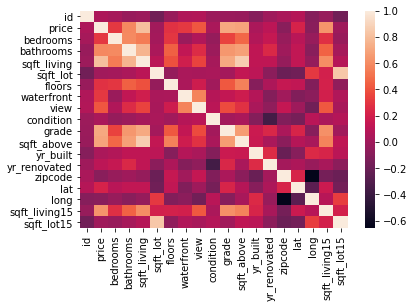

In [132]:
plt.figure
sns.heatmap(df_reno.corr())

<AxesSubplot:>

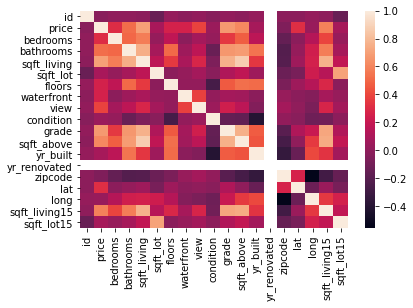

In [139]:
plt.figure
sns.heatmap(df_nonreno.corr())

In [138]:
df_reno.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.053034,0.025623,-0.027723,-0.010941,-0.173723,-0.028599,0.066275,0.068856,-0.015769,-0.017927,-0.028932,-0.097080,0.000074,0.040010,0.082589,-0.097888,-0.031665,-0.173531
price,0.053034,1.000000,0.308728,0.590382,0.808828,0.008414,0.284596,0.313245,0.414592,0.040630,0.710605,0.701441,0.041975,0.108890,-0.081564,0.217917,-0.086646,0.634703,0.002057
bedrooms,0.025623,0.308728,1.000000,0.598472,0.540815,0.016368,0.306815,-0.022298,0.061674,-0.038149,0.349317,0.470209,0.073115,0.150151,-0.034196,0.093716,-0.034986,0.279603,-0.024587
bathrooms,-0.027723,0.590382,0.598472,1.000000,0.760780,0.043746,0.446544,0.127554,0.260066,-0.014560,0.648625,0.679573,0.123941,0.246782,0.000793,0.130950,-0.086339,0.455618,0.027519
sqft_living,-0.010941,0.808828,0.540815,0.760780,1.000000,0.103310,0.397861,0.195101,0.349434,0.024670,0.716976,0.869663,0.122118,0.125528,-0.038173,0.129181,-0.041625,0.611537,0.081063
sqft_lot,-0.173723,0.008414,0.016368,0.043746,0.103310,1.000000,-0.039130,0.039904,0.029425,0.041274,0.016017,0.138379,0.111843,-0.080114,-0.201567,-0.181027,0.308157,0.206222,0.842747
floors,-0.028599,0.284596,0.306815,0.446544,0.397861,-0.039130,1.000000,0.048185,0.178992,0.009085,0.418574,0.562429,-0.095604,0.048349,0.147898,0.126097,-0.110678,0.211481,-0.061416
waterfront,0.066275,0.313245,-0.022298,0.127554,0.195101,0.039904,0.048185,1.000000,0.571892,0.081344,0.137006,0.177983,0.075893,-0.101402,0.008711,-0.116097,-0.076805,0.201778,0.061867
view,0.068856,0.414592,0.061674,0.260066,0.349434,0.029425,0.178992,0.571892,1.000000,0.101507,0.377873,0.282767,0.041378,-0.056492,0.143890,-0.007695,-0.172115,0.417472,0.034947
condition,-0.015769,0.040630,-0.038149,-0.014560,0.024670,0.041274,0.009085,0.081344,0.101507,1.000000,0.015542,0.039094,-0.101195,-0.363128,-0.119086,-0.154306,0.098073,0.044235,0.078205


In [134]:
df_nonreno.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.019465,0.007097,0.007804,-0.007594,-0.134346,0.022485,-0.008398,0.012040,-0.024300,0.009991,-0.008061,0.026072,NaN,-0.008831,-0.007977,0.023680,0.002282,-0.139994
price,-0.019465,1.000000,0.307928,0.522744,0.701402,0.091497,0.264053,0.260302,0.386576,0.043131,0.672643,0.614452,0.083286,NaN,-0.057259,0.316277,0.038935,0.589956,0.086435
bedrooms,0.007097,0.307928,1.000000,0.506927,0.575535,0.025864,0.174977,-0.005695,0.081118,0.023528,0.354523,0.474448,0.165070,NaN,-0.154801,-0.010892,0.138691,0.396733,0.027481
bathrooms,0.007804,0.522744,0.506927,1.000000,0.752816,0.082151,0.509361,0.055401,0.171119,-0.132837,0.666262,0.686312,0.547116,NaN,-0.214500,0.023911,0.241937,0.576540,0.084635
sqft_living,-0.007594,0.701402,0.575535,0.752816,1.000000,0.168654,0.358746,0.099673,0.277585,-0.063142,0.767830,0.877386,0.344146,NaN,-0.209618,0.053699,0.258069,0.766309,0.181810
sqft_lot,-0.134346,0.091497,0.025864,0.082151,0.168654,1.000000,-0.008924,0.026081,0.081135,-0.017598,0.112508,0.175708,0.051794,NaN,-0.127250,-0.081243,0.229797,0.143156,0.714278
floors,0.022485,0.264053,0.174977,0.509361,0.358746,-0.008924,1.000000,0.016491,0.018200,-0.269939,0.461631,0.528025,0.517599,NaN,-0.066657,0.055897,0.138710,0.284889,-0.011851
waterfront,-0.008398,0.260302,-0.005695,0.055401,0.099673,0.026081,0.016491,1.000000,0.380373,0.018080,0.080214,0.067363,-0.011777,NaN,0.027624,-0.010165,-0.034187,0.083152,0.027855
view,0.012040,0.386576,0.081118,0.171119,0.277585,0.081135,0.018200,0.380373,1.000000,0.050759,0.241473,0.162617,-0.040400,NaN,0.076227,0.006148,-0.066342,0.271901,0.074752
condition,-0.024300,0.043131,0.023528,-0.132837,-0.063142,-0.017598,-0.269939,0.018080,0.050759,1.000000,-0.153126,-0.164219,-0.398471,NaN,0.010200,-0.016412,-0.117018,-0.101823,-0.007540


<AxesSubplot:xlabel='grade', ylabel='yr_built'>

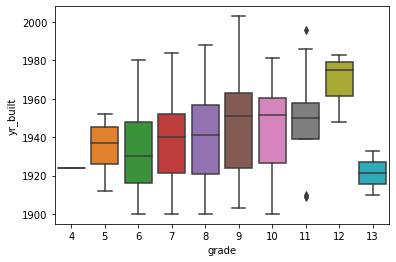

In [186]:
sns.boxplot(x = 'grade', y = 'yr_built', data = df_reno)

In [140]:
df_nonreno.sqft_basement.value_counts(normalize = True)

0.0       0.598769
?         0.020780
600.0     0.009662
500.0     0.009596
700.0     0.009397
            ...   
875.0     0.000066
1248.0    0.000066
2090.0    0.000066
2100.0    0.000066
1008.0    0.000066
Name: sqft_basement, Length: 276, dtype: float64

In [141]:
for col in df_nonreno.columns:
    print(col)
    print(df_nonreno[col].value_counts(normalize = True, ascending = False).head(5))
    print ("-----------------------------------------------------------------")

id
5430300171    0.000132
6791200120    0.000132
705730280     0.000132
3333002450    0.000132
9353300600    0.000132
Name: id, dtype: float64
-----------------------------------------------------------------
date
6/25/2014    0.006485
6/23/2014    0.006419
4/27/2015    0.005824
7/8/2014     0.005824
4/28/2015    0.005757
Name: date, dtype: float64
-----------------------------------------------------------------
price
350000.0    0.008404
450000.0    0.007478
500000.0    0.007412
425000.0    0.007213
550000.0    0.006816
Name: price, dtype: float64
-----------------------------------------------------------------
bedrooms
3    0.454106
4    0.322546
2    0.126332
5    0.074184
6    0.011515
Name: bedrooms, dtype: float64
-----------------------------------------------------------------
bathrooms
2.50    0.258686
1.00    0.176362
1.75    0.141023
2.25    0.096354
2.00    0.085765
Name: bathrooms, dtype: float64
-----------------------------------------------------------------
sqft_livi

In [66]:
conts= []
cats= []

In [142]:
for col in df_nonreno.columns:
    if (df_nonreno[col].nunique() < 25):
        cats.append(col)
    else: 
        conts.append(col)

In [143]:
conts

['id',
 'date',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'id',
 'date',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [144]:
cats

['bedrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'bedrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_renovated']

In [145]:
df_conts = df_nonreno.loc[:,conts]

In [146]:
df_conts

,id,date,price,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,...,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,12/9/2014,604000.0,3.00,1960,5000,1050,910.0,1965,0.0,...,1960,5000,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,2.00,1680,8080,1680,0.0,1987,0.0,...,1680,8080,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4.50,5420,101930,3890,1530.0,2001,0.0,...,5420,101930,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,2.25,1715,6819,1715,?,1995,0.0,...,1715,6819,1715,?,1995,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,1.00,1780,7470,1050,730.0,1960,0.0,...,1780,7470,1050,730.0,1960,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,2.50,1310,1294,1180,130.0,2008,0.0,...,1310,1294,1180,130.0,2008,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,2.50,1530,1131,1530,0.0,2009,0.0,...,1530,1131,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,2.50,2310,5813,2310,0.0,2014,0.0,...,2310,5813,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,0.75,1020,1350,1020,0.0,2009,0.0,...,1020,1350,1020,0.0,2009,98144,47.5944,-122.299,1020,2007


In [159]:
min_threshold, max_threshold = df_reno.price.quantile([0.25, 0.75])
min_threshold, max_threshold

(410000.0, 886250.0)

In [162]:
df_1 = df_reno[(df_reno.price < max_threshold) & (df_reno.price > min_threshold)]

In [163]:
df_1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
35,9547205180,6/13/2014,696000.0,3,2.50,2300,3060,1.5,0.0,0.0,...,8,1510,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264
209,6300000550,7/17/2014,464000.0,6,3.00,2300,3404,2.0,0.0,0.0,...,7,1600,700.0,1920,1994.0,98133,47.7067,-122.343,1560,1312
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,...,7,1230,220.0,1915,1978.0,98166,47.4497,-122.375,2030,13193
379,7132300695,4/21/2015,435000.0,3,1.50,1300,3348,1.5,0.0,0.0,...,7,1300,0.0,1904,2014.0,98144,47.5920,-122.307,1590,2577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19497,6821101285,8/14/2014,819000.0,3,1.75,1850,6000,1.5,0.0,0.0,...,8,1650,200.0,1913,1999.0,98199,47.6528,-122.401,1540,6000
19524,923000115,10/29/2014,588000.0,3,1.75,2310,7620,2.0,0.0,0.0,...,8,2310,0.0,1942,1988.0,98177,47.7266,-122.363,2200,7672
19602,6392000625,7/12/2014,451000.0,2,1.00,900,6000,1.0,0.0,0.0,...,7,900,0.0,1944,2004.0,98115,47.6855,-122.289,1460,4800
20041,126039256,9/4/2014,434900.0,3,2.00,1520,5040,2.0,0.0,0.0,...,7,1520,0.0,1977,2006.0,98177,47.7770,-122.362,1860,8710


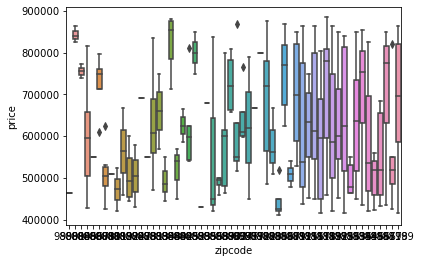

In [182]:
fig = sns.boxplot(x = 'zipcode', y = 'price', data = df_1)


In [73]:
df_cats

,bedrooms,floors,waterfront,view,condition,grade
0,3,1.0,NaN,0.0,3,7
1,3,2.0,0.0,0.0,3,7
2,2,1.0,0.0,0.0,3,6
3,4,1.0,0.0,0.0,5,7
4,3,1.0,0.0,0.0,3,8
...,...,...,...,...,...,...
21592,3,3.0,0.0,0.0,3,8
21593,4,2.0,0.0,0.0,3,8
21594,2,2.0,0.0,0.0,3,7
21595,3,2.0,NaN,0.0,3,8


In [74]:
df_cats.dropna()

,bedrooms,floors,waterfront,view,condition,grade
1,3,2.0,0.0,0.0,3,7
2,2,1.0,0.0,0.0,3,6
3,4,1.0,0.0,0.0,5,7
4,3,1.0,0.0,0.0,3,8
5,4,1.0,0.0,0.0,3,11
...,...,...,...,...,...,...
21591,3,2.0,0.0,0.0,3,8
21592,3,3.0,0.0,0.0,3,8
21593,4,2.0,0.0,0.0,3,8
21594,2,2.0,0.0,0.0,3,7


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

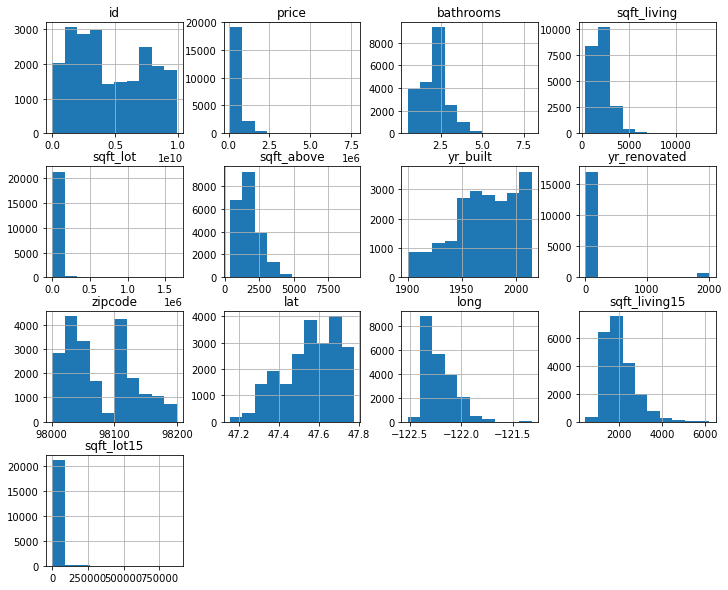

In [75]:
df_conts.hist(figsize = (12,10))

In [76]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [77]:
df_orig = pd.read_csv("data/kc_house_data.csv")

In [78]:
outcome = "price"

In [79]:
x_cols = df_orig.dropna().drop(["price", "sqft_basement", "id", "date", "sqft_above", "sqft_living15"], axis = 1).columns

In [80]:
x_cols

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15'],
      dtype='object')

In [81]:
predictors = '+'.join(x_cols)

In [82]:
predictors

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+yr_built+yr_renovated+zipcode+lat+long+sqft_lot15'

In [83]:
f = outcome + '~' + predictors

In [84]:
f

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+yr_built+yr_renovated+zipcode+lat+long+sqft_lot15'

In [85]:
model = ols(formula = f, data= df_orig).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2446.
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:43:41   Log-Likelihood:            -2.1507e+05
No. Observations:               15762   AIC:                         4.302e+05
Df Residuals:                   15746   BIC:                         4.303e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.243e+07   3.38e+06      3.682      0.000    5.81e+06    1.91e+07
bedrooms     -3.782e+04   2224.734    -16.998      0.000   -4.22e+04   -3.35e+04
bathrooms     3.944e+04   3824.310     10.314      0.000    3.19e+04    4.69e+04
sqft_living    186.5146      3.678     50.714      0.000     179.306     193.723
sqft_lot         0.0905      0.056      1.609      0.108      -0.020       0.201
floors        1.704e+04   3826.392      4.452      0.000    9534.917    2.45e+04
waterfront    6.131e+05   2.06e+04     29.791      0.000    5.73e+05    6.53e+05
view          5.149e+04   2505.480     20.551      0.000    4.66e+04    5.64e+04
condition     2.423e+04   2780.223      8.714      0.000    1.88e+04    2.97e+04
grade         1.006e+05   2412.252     41.688      0.000    9.58e+04    1.05e+05
yr_built     -2701.0478     86.085    -31.376      0.000   -2869.785   -2532.310
yr_renovated    18.4269      4.371      4.215      0.000       9.858      26.995
zipcode       -596.7359     38.978    -15.310      0.000    -673.136    -520.335
lat           5.953e+05   1.26e+04     47.065      0.000    5.71e+05     6.2e+05
long         -1.833e+05   1.51e+04    -12.143      0.000   -2.13e+05   -1.54e+05
sqft_lot15      -0.3093      0.085     -3.651      0.000      -0.475      -0.143
==============================================================================
Omnibus:                    13686.966   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1479753.525
Skew:                           3.667   Prob(JB):                         0.00
Kurtosis:                      49.897   Cond. No.                     2.09e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='long', ylabel='lat'>

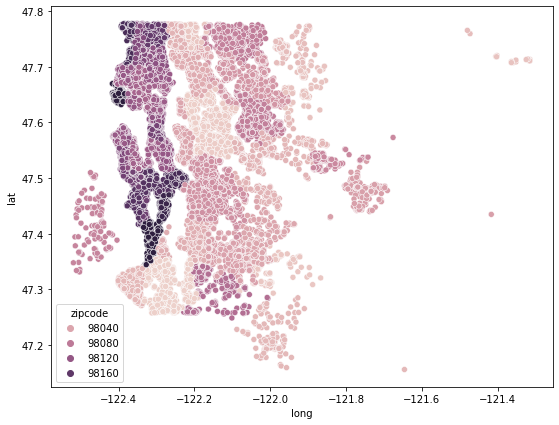

In [86]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='long', y='lat', hue= 'zipcode', data = df)